In [1]:
!which python3

/Users/karthikmaddukuri/anaconda3/envs/churn-model/bin/python3


In [2]:
%load_ext autoreload
%autoreload 2

In [10]:
# Standard imports
import os
import sys
sys.path.append('..')  #To let jupyter notebook to look one folder up

#Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#Local imports
from src.localpaths import RAW_DATA_PATH
from src.data.make_dataset import load_training_data

In [35]:
#Configuration for notebooks

# pd.options.display.max_columns = 100
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Load Featurized Data 

In [6]:
X_train, y_train = load_training_data(final=True)

In [7]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,0,1,25.30,25.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,7,1,1,75.15,525.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,1,4,1,1,20.05,85.50,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,29,1,1,76.00,2215.25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,3,1,1,75.10,270.70,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Exploring Feature Correlations

In [9]:
X_train.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.005691,0.010143,-0.011058,-0.001318,0.009706,0.014090,0.018822,0.007934,-0.009706,0.003307,0.014528,-0.003996,-0.003996,0.021021,-0.003996,0.025536,-0.003996,0.010371,-0.003996,0.011906,-0.003996,0.013873,-0.003996,0.012052,-0.008001,0.003300,0.000447,-0.006270,-0.004089
SeniorCitizen,0.005691,1.000000,0.016648,-0.211271,0.006169,0.000581,0.156417,0.219945,0.093900,-0.000581,0.123974,0.255584,-0.189718,-0.189718,-0.036739,-0.189718,0.070836,-0.189718,0.067831,-0.189718,-0.057097,-0.189718,0.102617,-0.189718,0.119373,-0.046580,-0.125754,-0.024547,0.167972,-0.147658
Partner,0.010143,0.016648,1.000000,0.447629,0.382443,0.031578,-0.020634,0.105603,0.324533,-0.031578,0.154350,0.009474,0.000755,0.000755,0.151724,0.000755,0.153876,0.000755,0.156254,0.000755,0.125586,0.000755,0.124236,0.000755,0.110650,0.086468,0.254102,0.105695,-0.082986,-0.108460
Dependents,-0.011058,-0.211271,0.447629,1.000000,0.162921,-0.005830,-0.109935,-0.114920,0.063421,0.005830,-0.021619,-0.169426,0.139496,0.139496,0.085854,0.139496,0.027996,0.139496,0.010485,0.139496,0.066857,0.139496,-0.017083,0.139496,-0.037314,0.062427,0.206994,0.082329,-0.152754,0.053380
tenure,-0.001318,0.006169,0.382443,0.162921,1.000000,0.005917,0.004055,0.253618,0.827555,-0.005917,0.342159,0.025088,-0.043782,-0.043782,0.329459,-0.043782,0.361964,-0.043782,0.361612,-0.043782,0.330507,-0.043782,0.280702,-0.043782,0.292136,0.203930,0.556371,0.238479,-0.200369,-0.233260
PhoneService,0.009706,0.000581,0.031578,-0.005830,0.005917,1.000000,0.014489,0.247419,0.113558,-1.000000,0.282513,0.288234,0.172087,0.172087,-0.086044,0.172087,-0.058281,0.172087,-0.074532,0.172087,-0.084202,0.172087,-0.022690,0.172087,-0.028911,-0.010171,0.010091,-0.022687,0.008085,0.006735
PaperlessBilling,0.014090,0.156417,-0.020634,-0.109935,0.004055,0.014489,1.000000,0.359566,0.163911,-0.014489,0.169690,0.333920,-0.327897,-0.327897,0.010410,-0.327897,0.123735,-0.327897,0.112994,-0.327897,0.041767,-0.327897,0.230622,-0.327897,0.206972,-0.051368,-0.156178,-0.021134,0.214575,-0.207767
MonthlyCharges,0.018822,0.219945,0.105603,-0.114920,0.253618,0.247419,0.359566,1.000000,0.654344,-0.247419,0.492456,0.784458,-0.763444,-0.763444,0.301343,-0.763444,0.446048,-0.763444,0.483399,-0.763444,0.346062,-0.763444,0.630747,-0.763444,0.630638,0.003284,-0.067417,0.021418,0.271453,-0.375811
TotalCharges,0.007934,0.093900,0.324533,0.063421,0.827555,0.113558,0.163911,0.654344,1.000000,-0.113558,0.477110,0.363926,-0.377919,-0.377919,0.413964,-0.377919,0.511171,-0.377919,0.522223,-0.377919,0.439774,-0.377919,0.513516,-0.377919,0.525159,0.168169,0.357305,0.179514,-0.052095,-0.294976
MultipleLines_No phone service,-0.009706,-0.000581,-0.031578,0.005830,-0.005917,-1.000000,-0.014489,-0.247419,-0.113558,1.000000,-0.282513,-0.288234,-0.172087,-0.172087,0.086044,-0.172087,0.058281,-0.172087,0.074532,-0.172087,0.084202,-0.172087,0.022690,-0.172087,0.028911,0.010171,-0.010091,0.022687,-0.008085,-0.006735


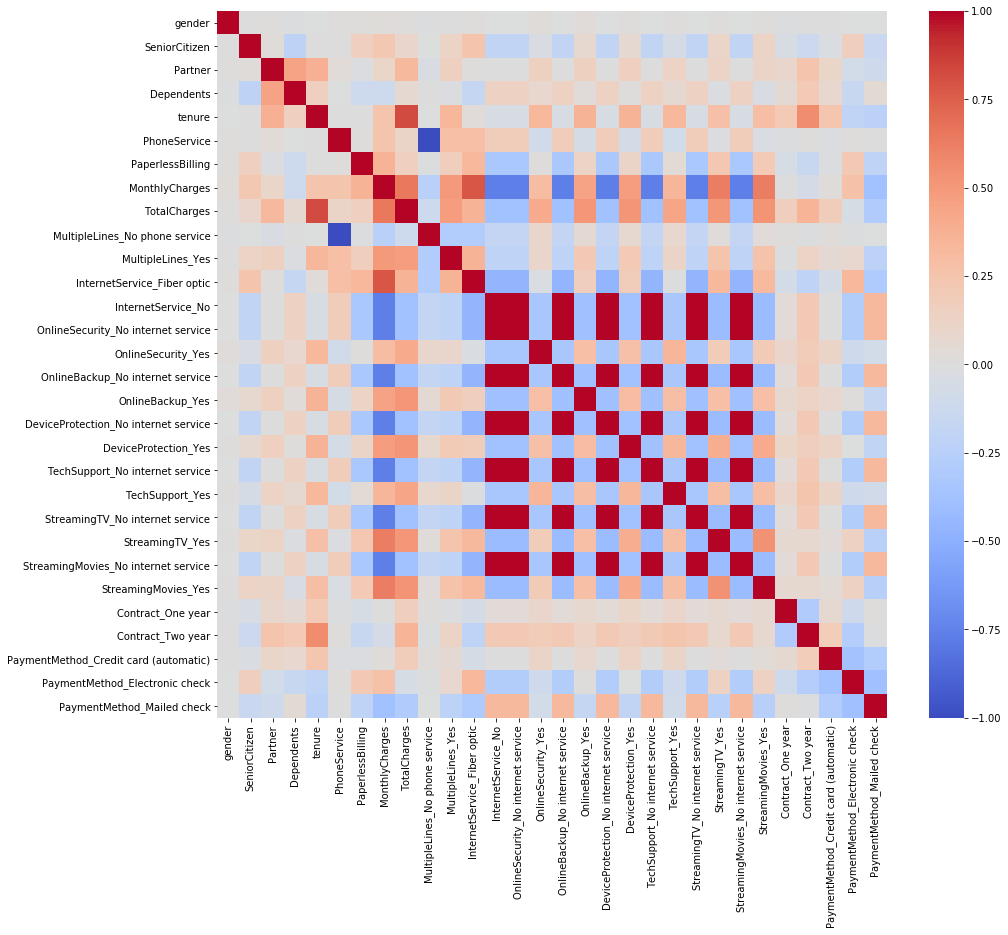

In [24]:
plt.figure(figsize=(15,13))
sns.heatmap(X_train.corr(), cmap='coolwarm', center=0 , yticklabels=True, xticklabels=True)

In [25]:
correlations = X_train.corr()

In [28]:
correlations = correlations.unstack().reset_index()

In [30]:
# So that, we can remove the duplicates. This is more like if we have gender and SeniorCitizen initially, \
# then SeniorCitizen and gender will be repeated and it does not show up
correlations = correlations[correlations['level_0'] < correlations['level_1']]

In [31]:
correlations.columns

Index(['level_0', 'level_1', 0], dtype='object')

In [38]:
correlations.sort_values(by=0, ascending=False)

,level_0,level_1,0
463,OnlineBackup_No internet service,OnlineSecurity_No internet service,1.000000
709,StreamingMovies_No internet service,TechSupport_No internet service,1.000000
413,OnlineSecurity_No internet service,StreamingMovies_No internet service,1.000000
411,OnlineSecurity_No internet service,StreamingTV_No internet service,1.000000
409,OnlineSecurity_No internet service,TechSupport_No internet service,1.000000
...,...,...,...
233,MonthlyCharges,StreamingMovies_No internet service,-0.763444
231,MonthlyCharges,StreamingTV_No internet service,-0.763444
229,MonthlyCharges,TechSupport_No internet service,-0.763444
223,MonthlyCharges,OnlineSecurity_No internet service,-0.763444


In [39]:
sorted(correlations.values, key = lambda x: abs(x[2]), reverse = True)

[array(['MultipleLines_No phone service', 'PhoneService', -1.0],
       dtype=object),
 array(['InternetService_No', 'OnlineSecurity_No internet service', 1.0],
       dtype=object),
 array(['InternetService_No', 'OnlineBackup_No internet service', 1.0],
       dtype=object),
 array(['InternetService_No', 'TechSupport_No internet service', 1.0],
       dtype=object),
 array(['InternetService_No', 'StreamingTV_No internet service', 1.0],
       dtype=object),
 array(['InternetService_No', 'StreamingMovies_No internet service', 1.0],
       dtype=object),
 array(['OnlineSecurity_No internet service',
        'TechSupport_No internet service', 1.0], dtype=object),
 array(['OnlineSecurity_No internet service',
        'StreamingTV_No internet service', 1.0], dtype=object),
 array(['OnlineSecurity_No internet service',
        'StreamingMovies_No internet service', 1.0], dtype=object),
 array(['OnlineBackup_No internet service',
        'OnlineSecurity_No internet service', 1.0], dtype=obje

# Feature Correlations with Churn

In [47]:
X_train.assign(**y_train).corr()[['Churn']].sort_values(by='Churn', ascending=False)

,Churn
Churn,1.000000
InternetService_Fiber optic,0.300112
PaymentMethod_Electronic check,0.294180
PaperlessBilling,0.188793
MonthlyCharges,0.186615
SeniorCitizen,0.146549
StreamingMovies_Yes,0.060152
StreamingTV_Yes,0.054414
MultipleLines_Yes,0.033019
gender,0.011997
